# Kidney Disease Prediction

This dataset contains **24 features**, based on which we can predict whether a particular person has kidney disease or not.

The features and their description are as follows:
 
1) **age**: The age of the patient.
2) **bp**: The patient's blood pressure measurement.
3) **sg**: The specific gravity of the patient's urine, indicating kidney function.
4) **al**: The presence of albumin in the urine, an indicator of kidney damage.
5) **su**: The sugar level in the urine.
6) **rbc**: The presence of red blood cells in the urine.
7) **pc**: The presence of pus cells in the urine, indicating infection.
8) **pcc**: Clumps of pus cells in the urine, indicating severe infection.
9) **ba**: The presence of bacteria in the urine.
10) **bgr**: Random blood glucose level measurement.
11) **bu**: The level of urea in the blood.
12) **sc**: The level of creatinine in the blood, an indicator of kidney function.
13) **sod**: The level of sodium in the blood.
14) **pot**: The level of potassium in the blood.
15) **hemo**: The level of hemoglobin in the blood.
16) **pcv**: The volume percentage of red blood cells in the blood.
17) **wc**: The count of white blood cells in the blood.
18) **rc**: The count of red blood cells in the blood.
19) **htn**: Whether the patient has high blood pressure.
20) **dm**: Whether the patient has diabetes mellitus.
21) **cad**: Whether the patient has coronary artery disease.
22) **appet**: The patient's appetite status.
23) **pe**: The presence of swelling in the legs or feet.
24) **ane**: Whether the patient has anemia.
25) **classification**: Kidney disease (0 = yes, 1 = no)

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv("kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Exploratory Data Analysis

In [4]:
df.shape

(400, 26)

In [5]:
#dropping id column
df.drop('id', axis=1, inplace=True)

In [6]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
#renaming columns for convenience
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

In [8]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
df['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [12]:
#changing the datatype
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [13]:
cols = df.select_dtypes(include='object')
for col in cols:
    df[col] = df[col].astype("category")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      391 non-null    float64 
 1   blood_pressure           388 non-null    float64 
 2   specific_gravity         353 non-null    float64 
 3   albumin                  354 non-null    float64 
 4   sugar                    351 non-null    float64 
 5   red_blood_cells          248 non-null    category
 6   pus_cell                 335 non-null    category
 7   pus_cell_clumps          396 non-null    category
 8   bacteria                 396 non-null    category
 9   blood_glucose_random     356 non-null    float64 
 10  blood_urea               381 non-null    float64 
 11  serum_creatinine         383 non-null    float64 
 12  sodium                   313 non-null    float64 
 13  potassium                312 non-null    float64 
 14  haemoglobi

In [15]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [16]:
#separating categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'category']
num_cols = [col for col in df.columns if df[col].dtype != 'category']

In [17]:
#printing unique values
for col in cat_cols:
    print(f"{col} - {df[col].unique()}\n")

red_blood_cells - [NaN, 'normal', 'abnormal']
Categories (2, object): ['abnormal', 'normal']

pus_cell - ['normal', 'abnormal', NaN]
Categories (2, object): ['abnormal', 'normal']

pus_cell_clumps - ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present']

bacteria - ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present']

hypertension - ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']

diabetes_mellitus - ['yes', 'no', ' yes', '\tno', '\tyes', NaN]
Categories (5, object): ['\tno', '\tyes', ' yes', 'no', 'yes']

coronary_artery_disease - ['no', 'yes', '\tno', NaN]
Categories (3, object): ['\tno', 'no', 'yes']

appetite - ['good', 'poor', NaN]
Categories (2, object): ['good', 'poor']

pedal_edema - ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']

anemia - ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']

class - ['ckd', 'ckd\t', 'notckd']
Categories (3, object): ['ckd', 'ckd\t', 'notckd']



In [18]:
#correcting some incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

In [19]:
#mapping labels to 0 and 1
df['class'] = df['class'].map({'ckd':0, 'not ckd': 1})

In [20]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} - {df[col].unique()}")

diabetes_mellitus - ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']
coronary_artery_disease - ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']
class - [0, 1]
Categories (2, int64): [0, 1]


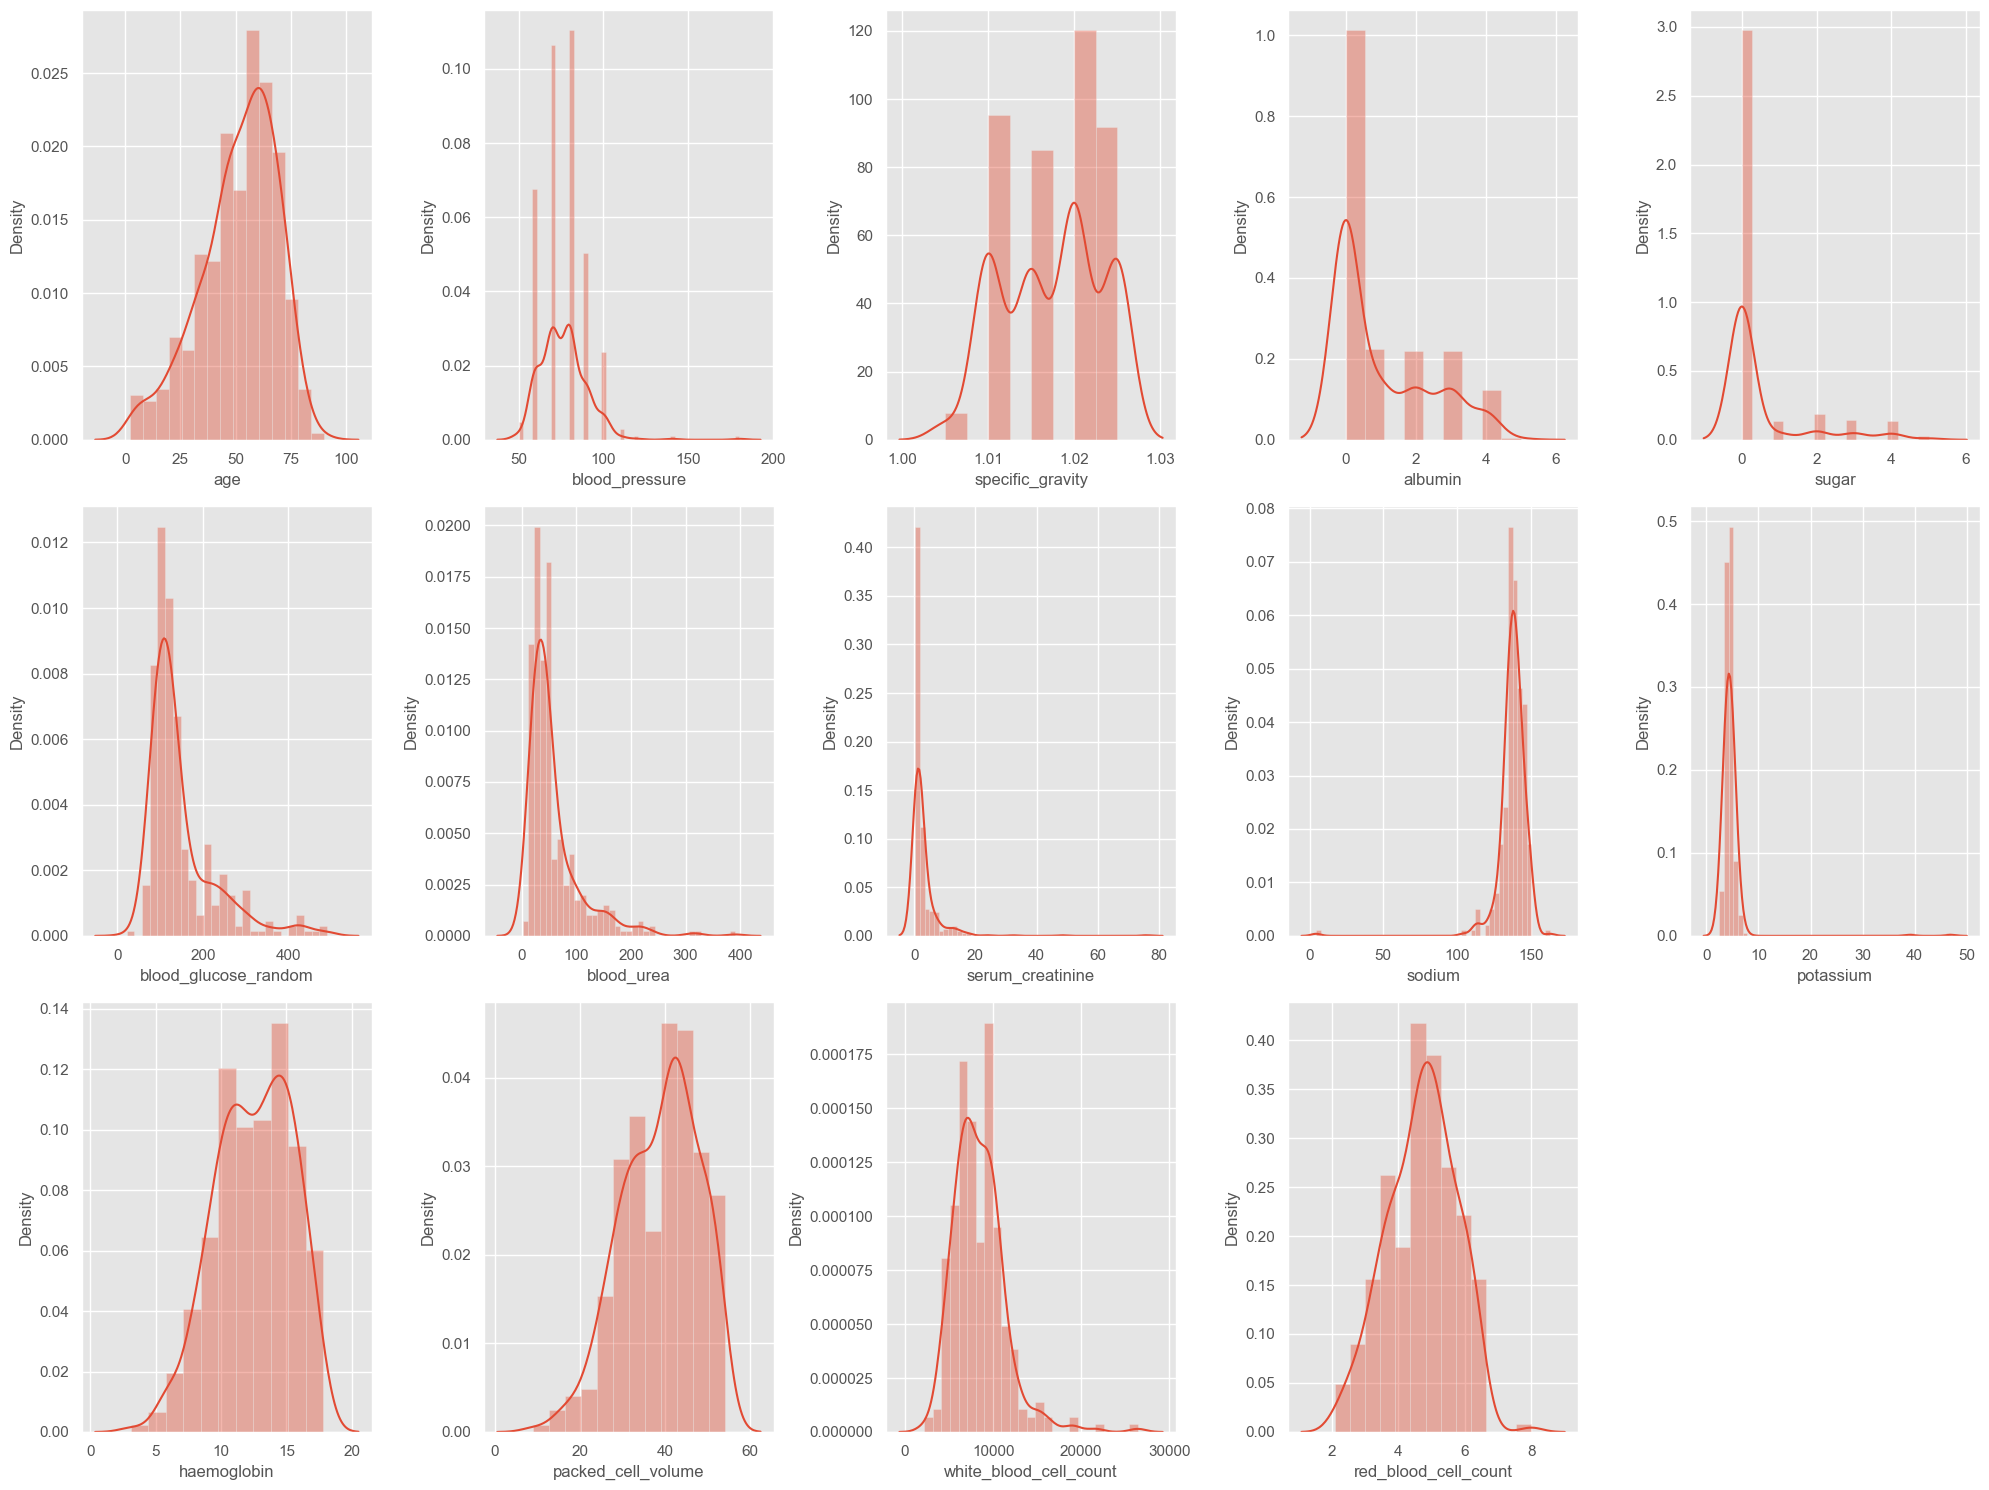

In [21]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

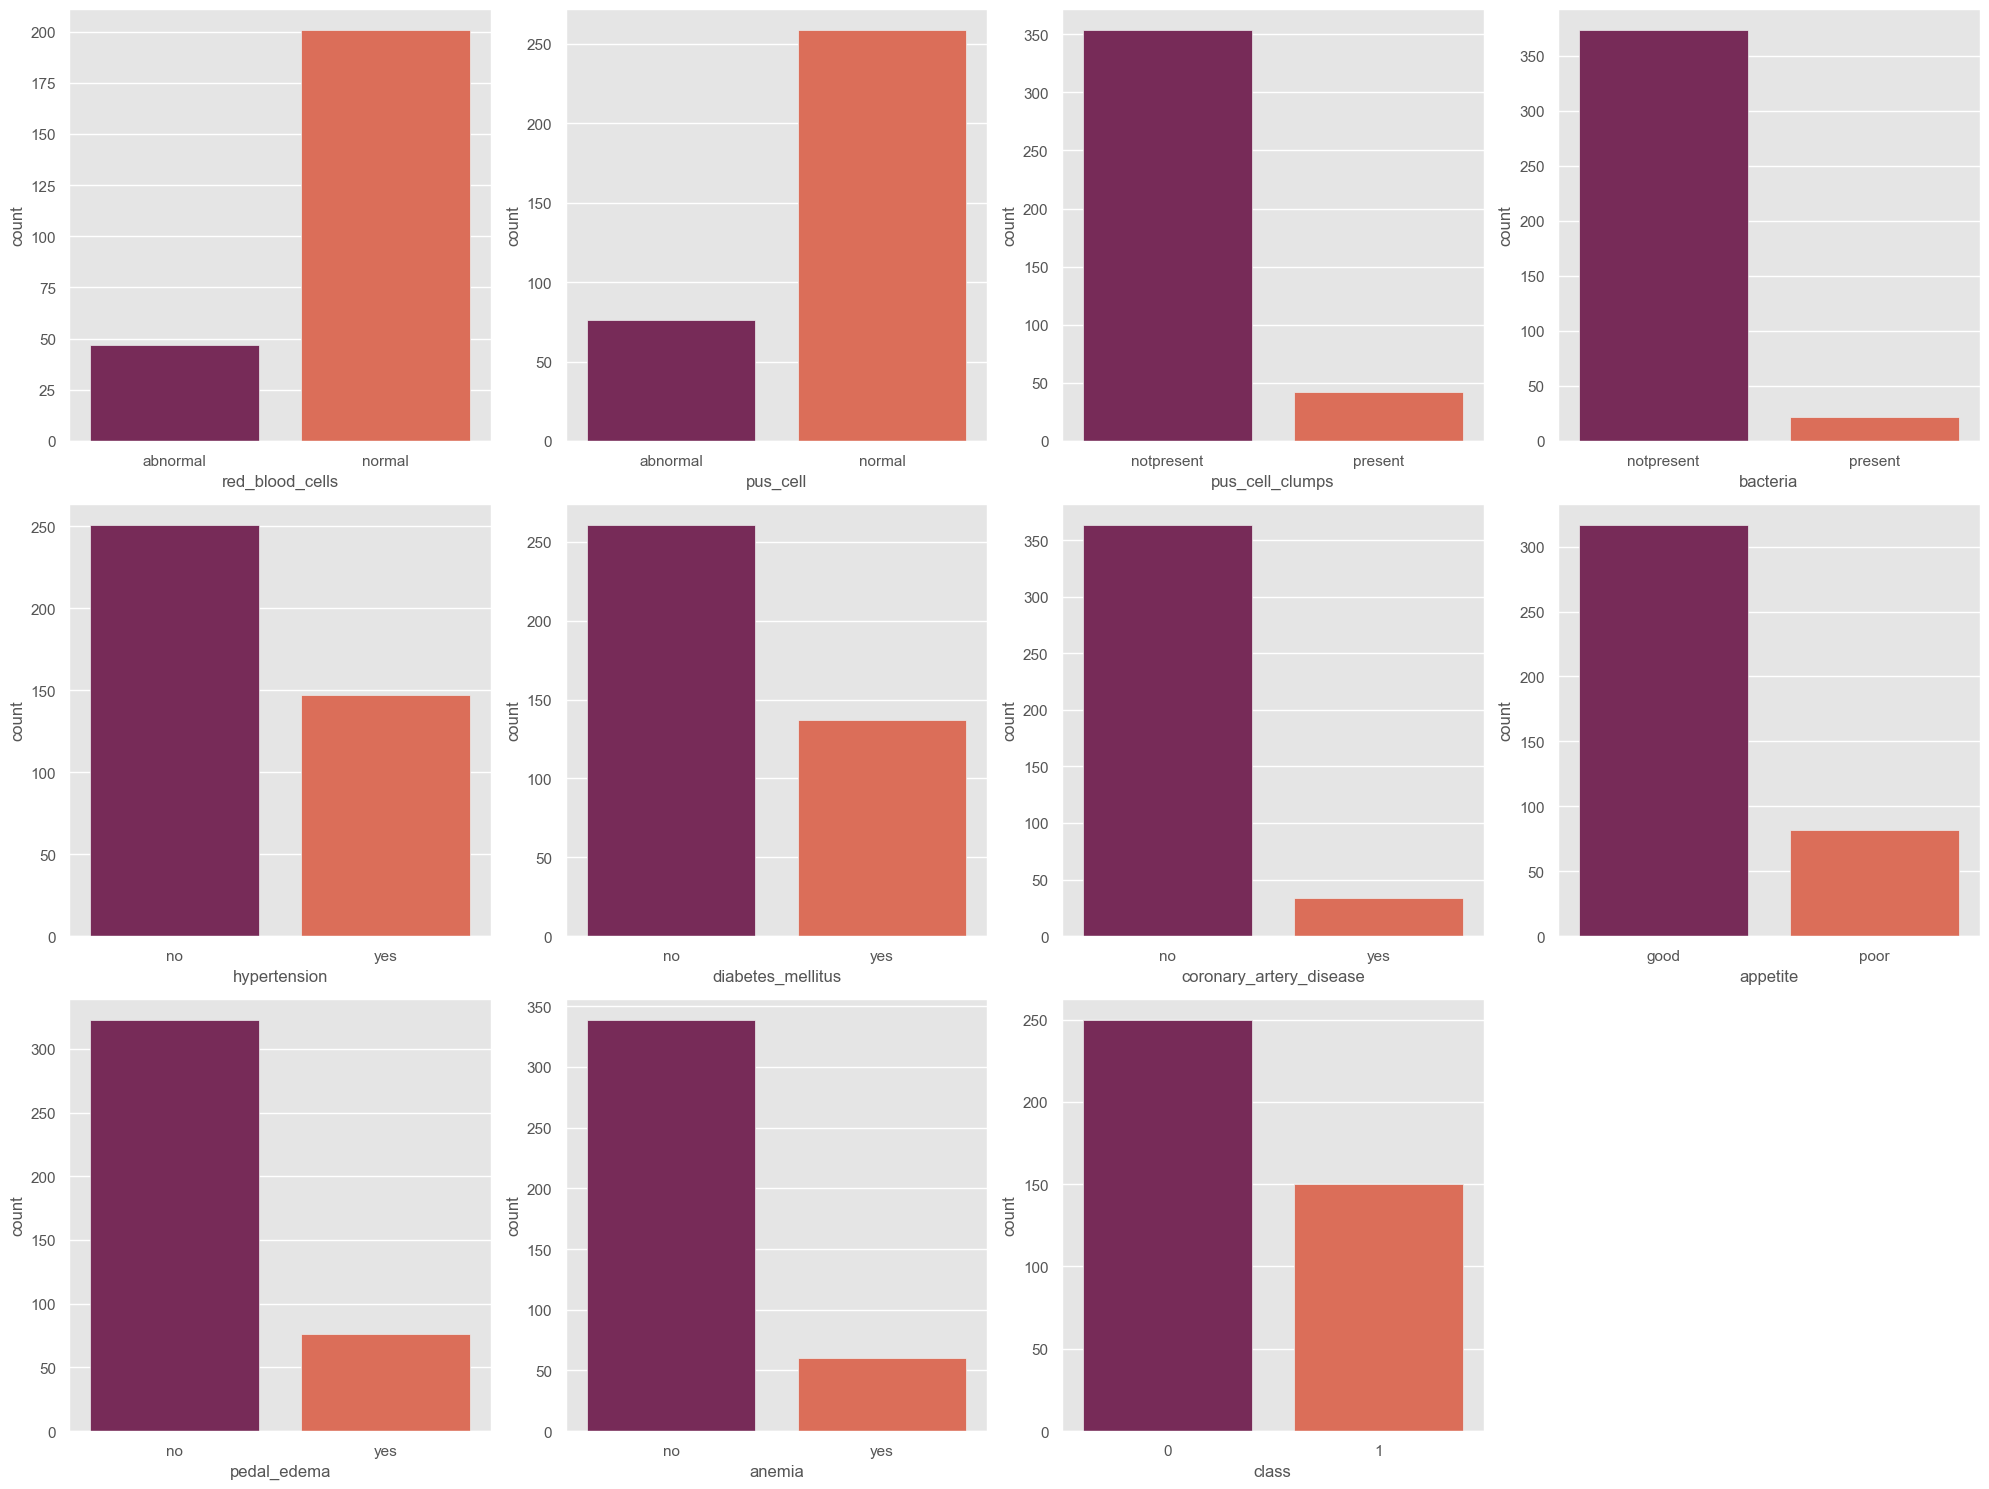

In [22]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 12:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column, palette = 'rocket')
        plt.xlabel(column)    
    plotnumber += 1

plt.tight_layout()
plt.show()

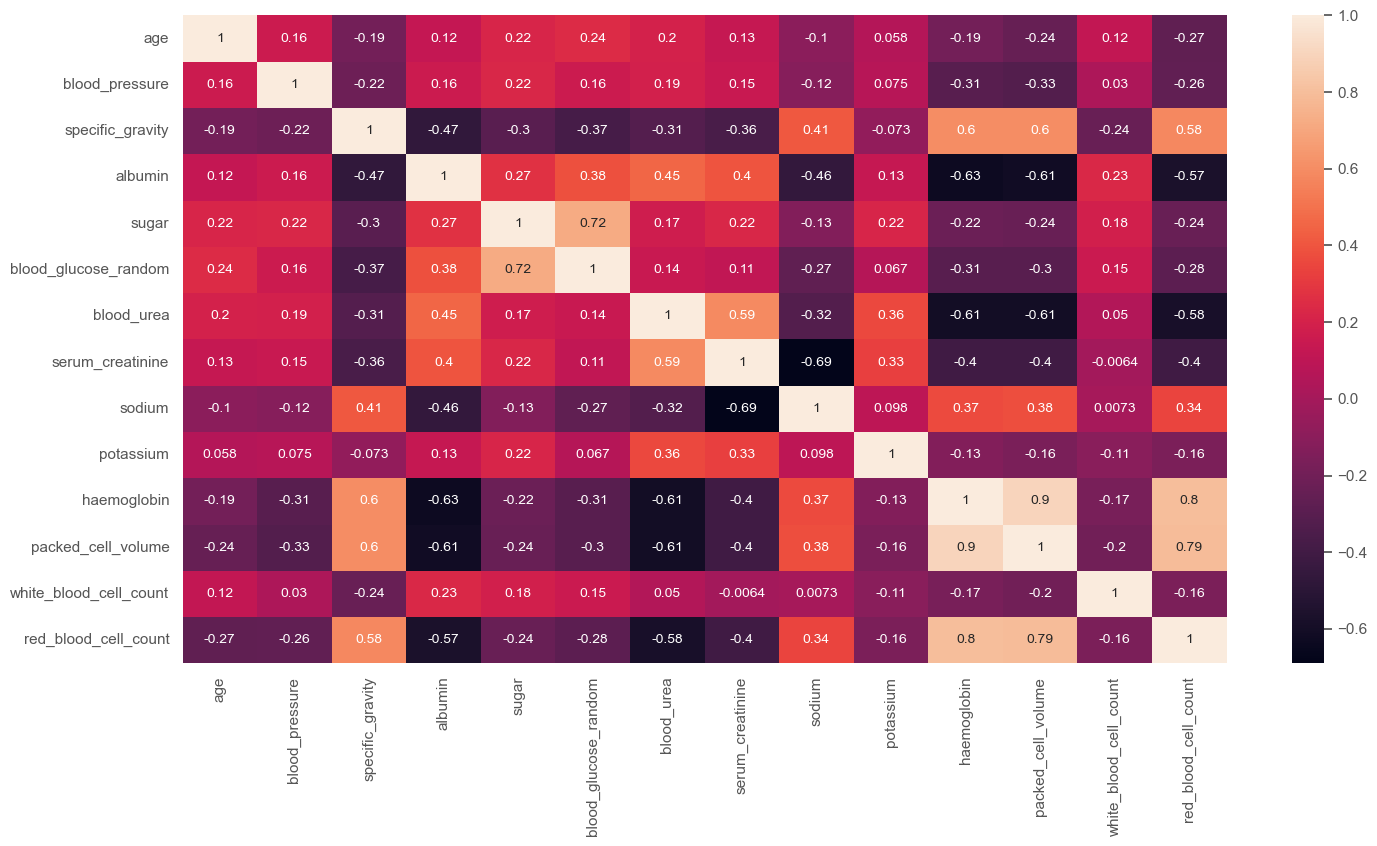

In [23]:
#correlation heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, linecolor = 'lightgray')
plt.show()

In [24]:
#defining function for creating plots

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

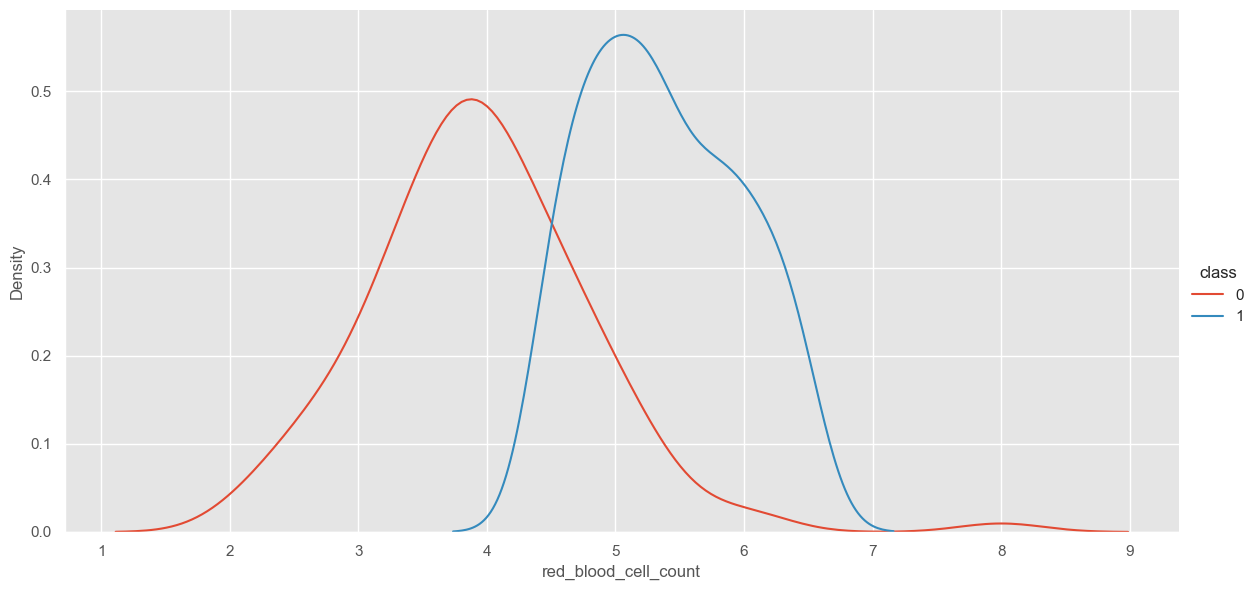

In [25]:
kde('red_blood_cell_count')

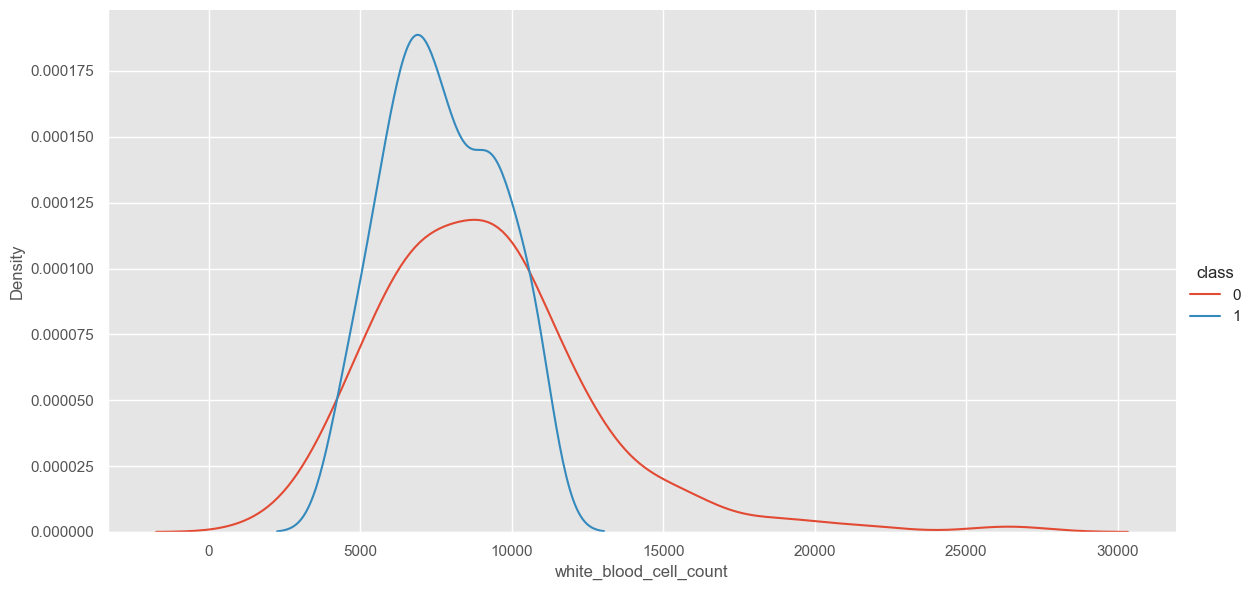

In [26]:
kde('white_blood_cell_count')

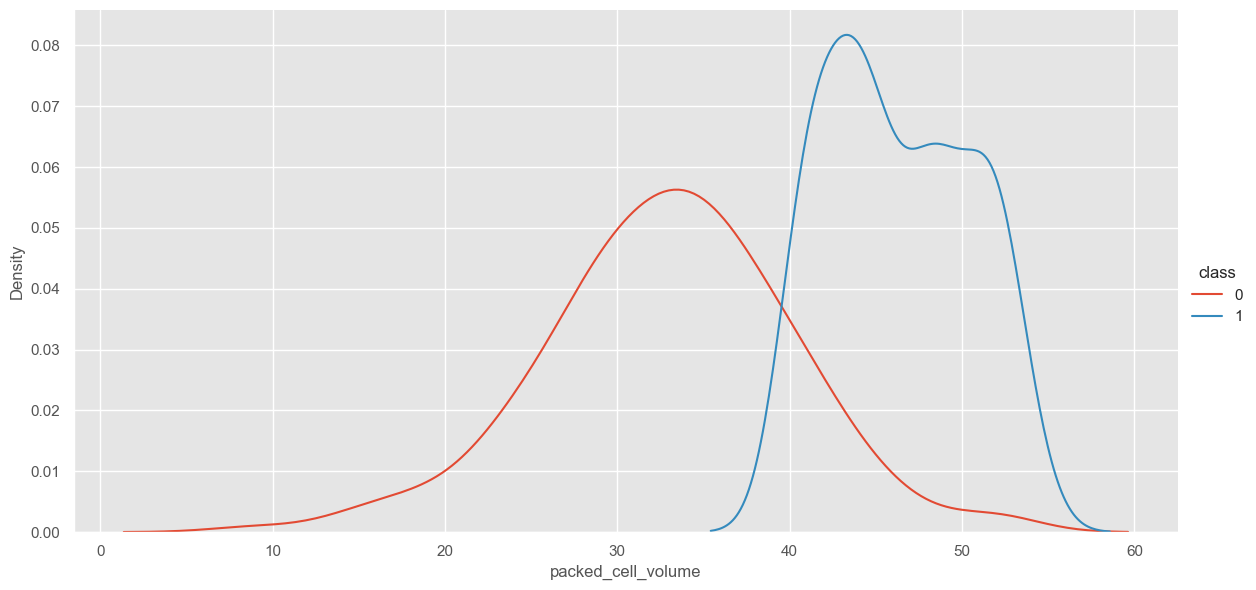

In [27]:
kde('packed_cell_volume')

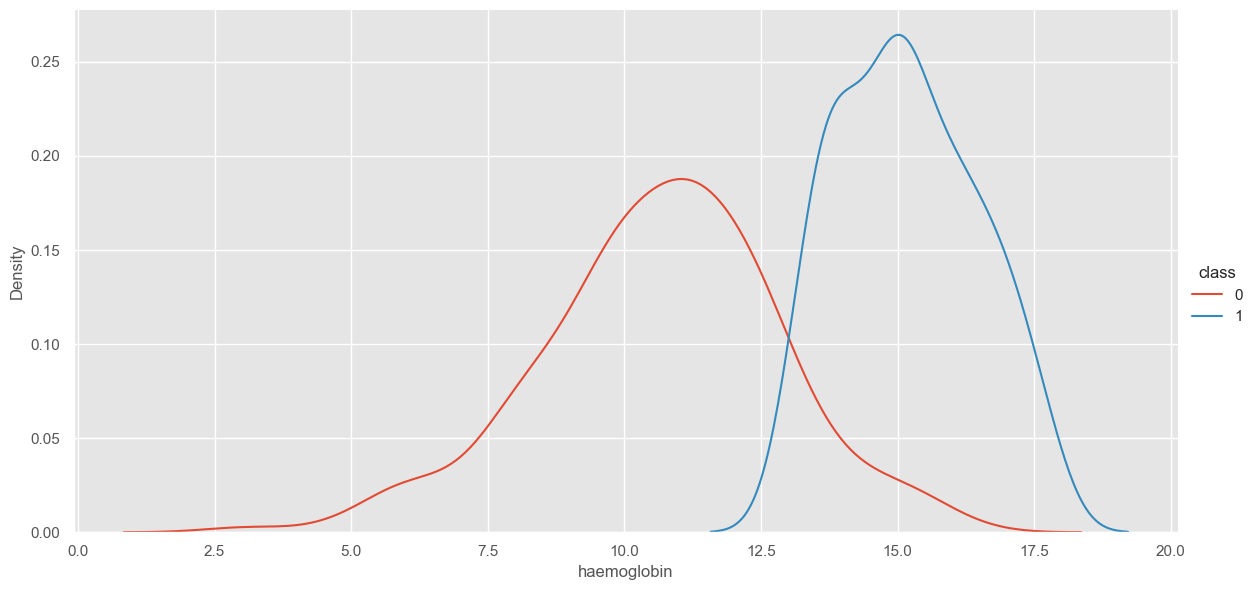

In [28]:
kde('haemoglobin')

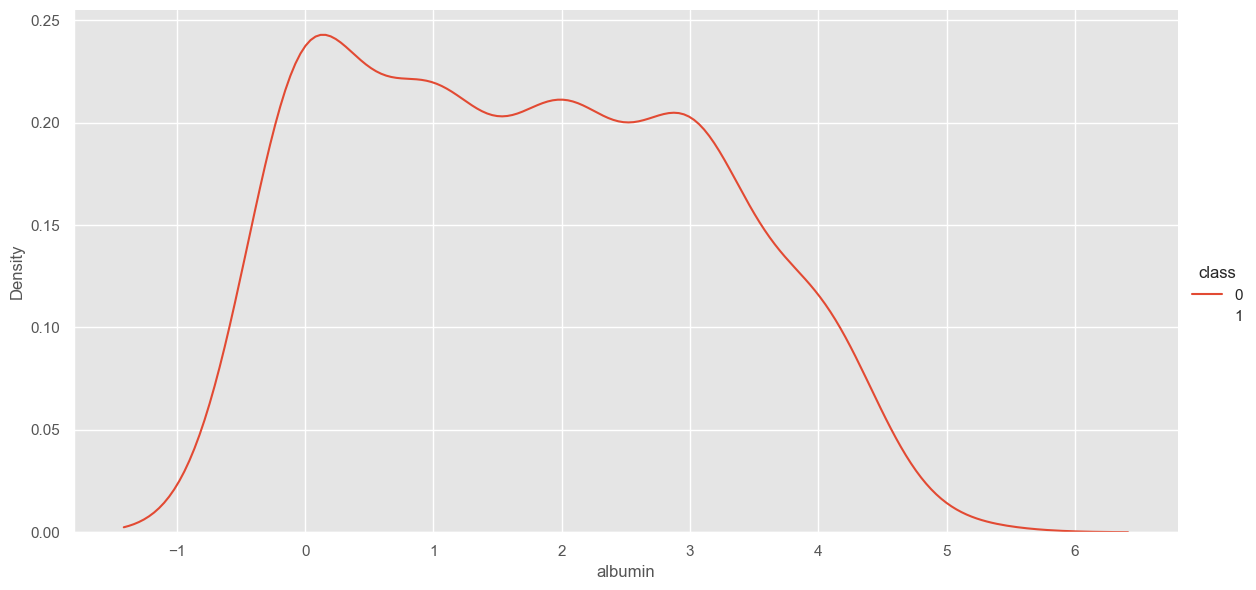

In [29]:
kde('albumin')

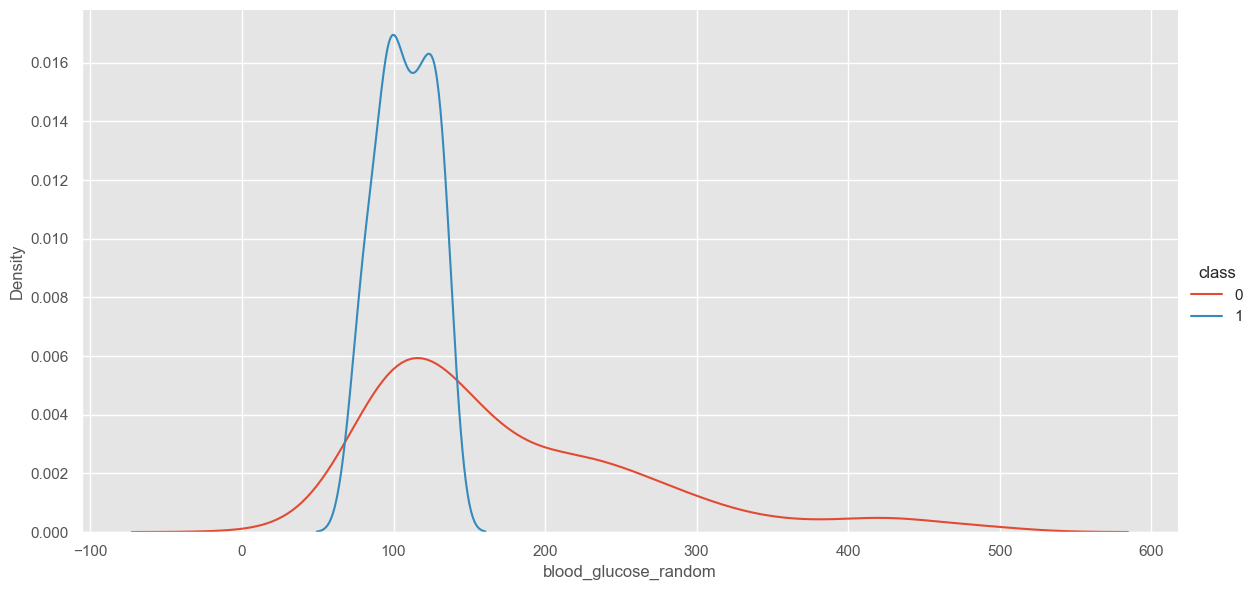

In [30]:
kde('blood_glucose_random')

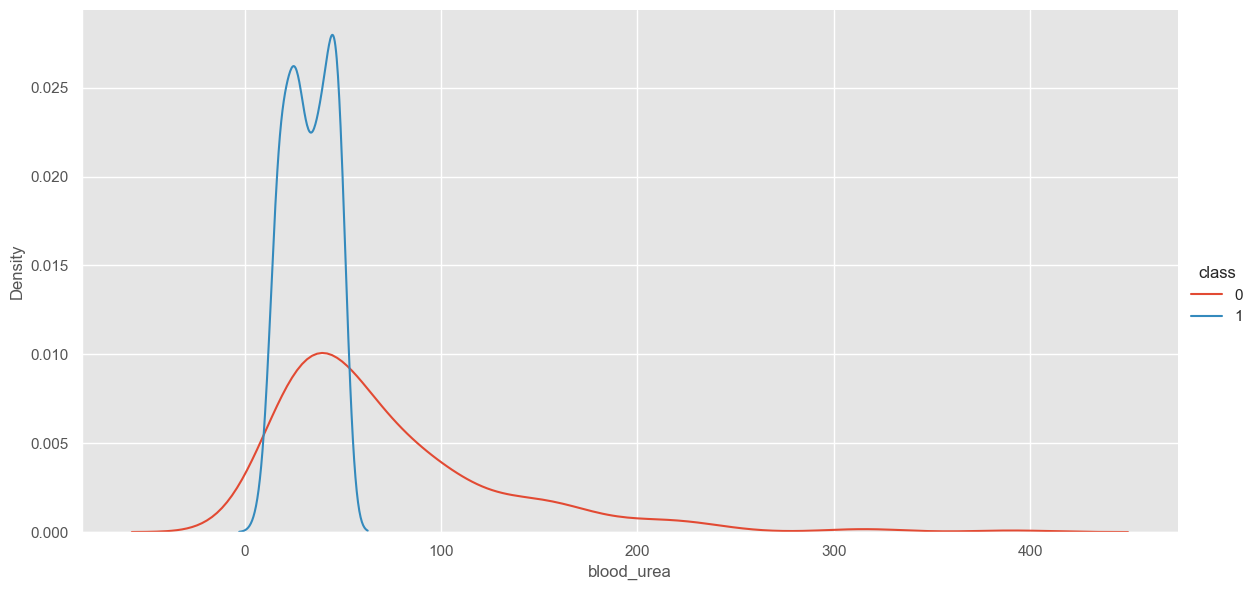

In [31]:
kde('blood_urea')

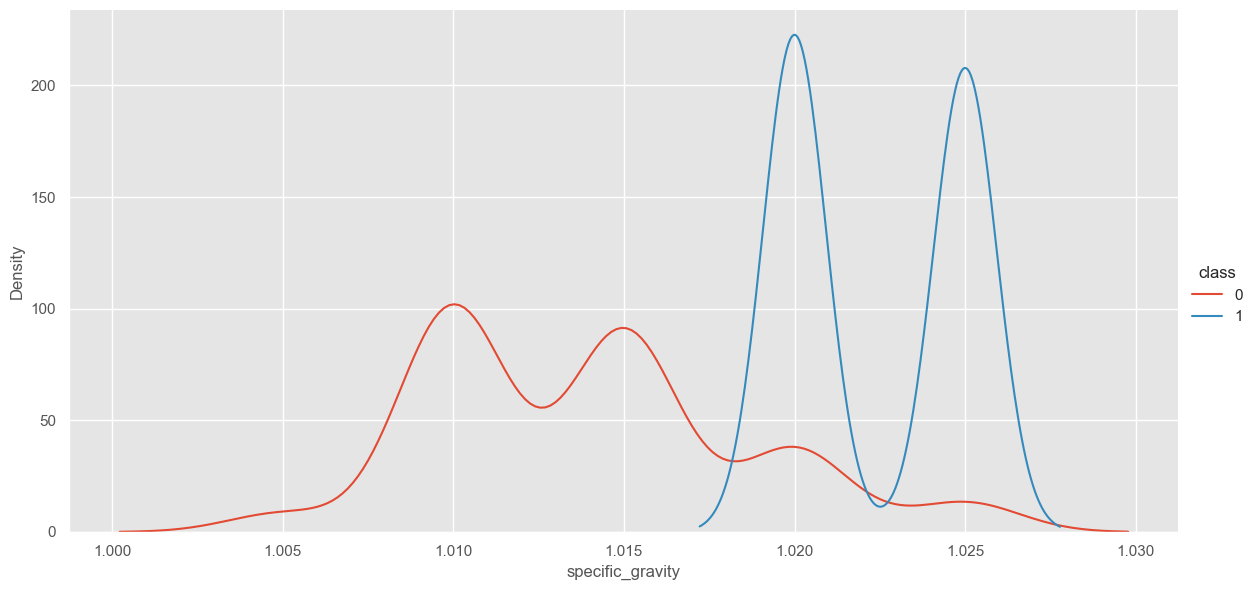

In [32]:
kde('specific_gravity')

In [33]:
#checking for missing value
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [34]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [35]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

For replacing the null values, we will use two different methods:
1) Random sampling - for higher number of null values
2) Mode - for lesser number of null values

In [36]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [37]:
#random sampling for numerical features
for col in num_cols:
    random_sampling(col)

In [38]:
#for categorical features
random_sampling('red_blood_cells')
random_sampling('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [39]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

### Feature Engineeering

In [40]:
#checking number of categories for categorical features
for col in cat_cols:
    print(f"{col} - {df[col].nunique()} categories")

red_blood_cells - 2 categories
pus_cell - 2 categories
pus_cell_clumps - 2 categories
bacteria - 2 categories
hypertension - 2 categories
diabetes_mellitus - 2 categories
coronary_artery_disease - 2 categories
appetite - 2 categories
pedal_edema - 2 categories
anemia - 2 categories
class - 2 categories


In [41]:
one_hot_cols = cat_cols
one_hot_cols.remove("class")

In [42]:
#one hot encoding
df = pd.get_dummies(df,  columns = one_hot_cols, drop_first=True, dtype=int)

In [43]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,red_blood_cells_normal,pus_cell_normal,pus_cell_clumps_present,bacteria_present,hypertension_yes,diabetes_mellitus_yes,coronary_artery_disease_yes,appetite_poor,pedal_edema_yes,anemia_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,140.0,3.5,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,239.0,18.0,0.8,135.0,5.0,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,139.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,124.0,4.2,...,1,1,0,0,0,0,0,0,0,0


In [44]:
df.shape

(400, 25)

### Train Test Split

In [45]:
X = df.drop('class', axis = 1)
y = df['class']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [47]:
X_train.shape

(320, 24)

In [48]:
X_test.shape

(80, 24)

### Model Training

### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy - {knn_acc}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 0.8
Testing Accuracy - 0.675

Confusion Matrix 
 [[35 15]
 [11 19]]

Classification Report 
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        50
           1       0.56      0.63      0.59        30

    accuracy                           0.68        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.69      0.68      0.68        80



### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, dt.predict(X_train))}")
print(f"Testing Accuracy - {accuracy_score(y_test, y_pred)}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 1.0
Testing Accuracy - 0.975

Confusion Matrix 
 [[48  2]
 [ 0 30]]

Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [52]:
#hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search_dt = GridSearchCV(dt, GRID_PARAMETER, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']})

In [53]:
#best parameter and best score
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.984375


In [54]:
dt = grid_search_dt.best_estimator_

y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, dt.predict(X_train))}")
print(f"Testing Accuracy - {accuracy_score(y_test, y_pred)}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 0.9875
Testing Accuracy - 0.95

Confusion Matrix 
 [[46  4]
 [ 0 30]]

Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.88      1.00      0.94        30

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators = 400)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [56]:
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Testing Accuracy - {accuracy_score(y_test, y_pred)}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 0.996875
Testing Accuracy - 0.975

Confusion Matrix 
 [[48  2]
 [ 0 30]]

Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



### XG Boost

In [57]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective="binary:logistic", learning_rate = 0.01, max_depth = 10, n_estimators = 100)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred = xg.predict(X_test)
xg_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, xg.predict(X_train))}")
print(f"Testing Accuracy - {accuracy_score(y_test, y_pred)}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 0.99375
Testing Accuracy - 0.9875

Confusion Matrix 
 [[49  1]
 [ 0 30]]

Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy - {accuracy_score(y_test, y_pred)}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 0.9
Testing Accuracy - 0.9125

Confusion Matrix 
 [[43  7]
 [ 0 30]]

Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        50
           1       0.81      1.00      0.90        30

    accuracy                           0.91        80
   macro avg       0.91      0.93      0.91        80
weighted avg       0.93      0.91      0.91        80



### SVM

In [61]:
from sklearn.svm import SVC

svc  = SVC(probability=True)

parameter = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameter, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [62]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.001}
0.746875


In [63]:
svc  = SVC(C = 10, gamma = 0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.0001, probability=True)

In [64]:
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Testing Accuracy - {accuracy_score(y_test, y_pred)}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 0.98125
Testing Accuracy - 0.725

Confusion Matrix 
 [[40 10]
 [12 18]]

Classification Report 
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        50
           1       0.64      0.60      0.62        30

    accuracy                           0.73        80
   macro avg       0.71      0.70      0.70        80
weighted avg       0.72      0.72      0.72        80



### Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

PARAMETERS = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100,150,180, 200]
}
grid_search_gb = GridSearchCV(gb, PARAMETERS, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]})

In [67]:
print(grid_search_gb.best_params_)
print(grid_search_gb.best_score_)

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 150}
0.98125


In [68]:
gb = grid_search_gb.best_estimator_
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=150)

In [69]:
y_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred)
print(f"Training Accuracy - {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Testing Accuracy - {accuracy_score(y_test, y_pred)}\n")

print(f"Confusion Matrix \n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report \n{classification_report(y_test, y_pred)}")

Training Accuracy - 1.0
Testing Accuracy - 0.9625

Confusion Matrix 
 [[47  3]
 [ 0 30]]

Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        50
           1       0.91      1.00      0.95        30

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



### Models Comparison

In [70]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'Random Forest Classifier', 'XgBoost','Gradient Boosting'],
    'Score':[lr_acc, knn_acc, svc_acc, dt_acc, rf_acc, xg_acc, gb_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
5,XgBoost,0.9875
4,Random Forest Classifier,0.9750
6,Gradient Boosting,0.9625
3,DT,0.9500
0,Logistic Regression,0.9125
2,SVM,0.7250
1,KNN,0.6750


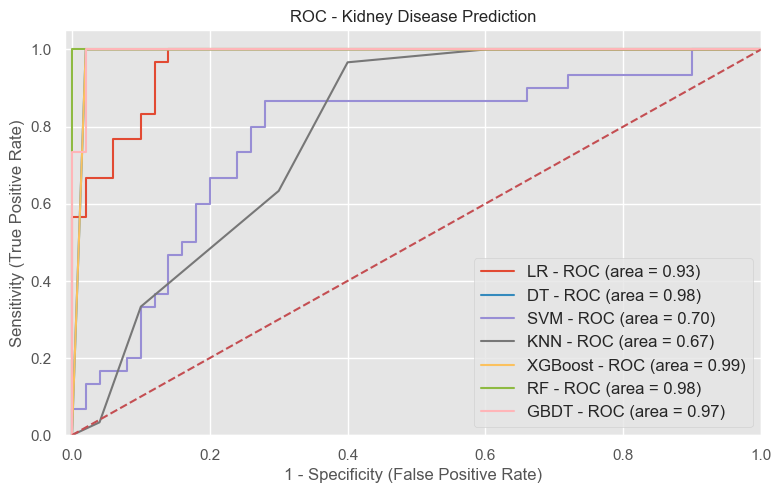

In [71]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xg,
},
{
    'label': 'RF',
    'model': rf,
},
{
    'label': 'GBDT',
    'model': gb,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[91.25, 95.0, 72.5, 67.5, 98.75, 97.5, 96.25]
[93.0, 96.33, 70.0, 66.67, 99.0, 99.0, 97.0]


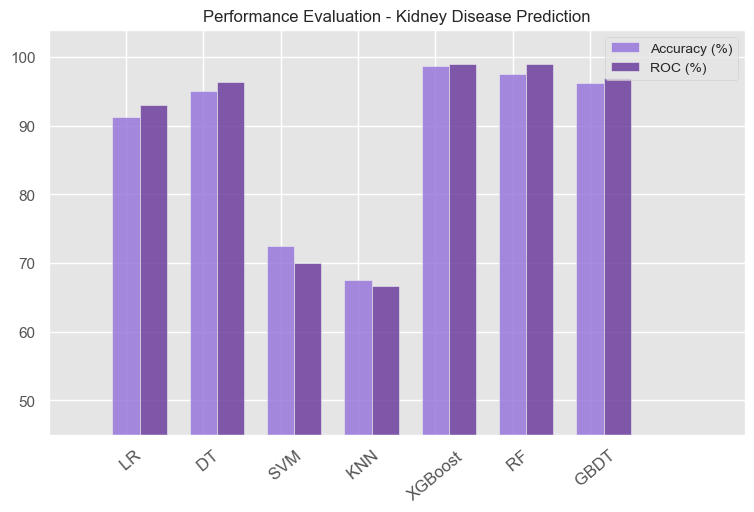

In [72]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xg,
},
{
    'label': 'RF',
    'model': rf,
},
{
    'label': 'GBDT',
    'model': gb,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xg_acc,4), 
                  100*round(rf_acc,4), 100*round(gb_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)


n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)


fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [73]:
import pickle
model = rf
pickle.dump(model, open("kindey.pkl", 'wb'))